In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer


C:\Users\gcara\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#dataset = pd.read_csv('./dataset.csv')
dataset = pd.read_csv('./low_mem_data.csv')

D:\sw\anaconda\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import seaborn as sns

In [4]:
#dataset.drop(['SRC', 'TGT','TXT'], axis=1,inplace=True)

In [5]:
#dataset.to_csv('./dataset.csv')

In [6]:
dataset[0:3]

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
0,Steel1943,BDD,1,1,'''Support''' as co-nom.,"23:13, 19 April 2013",2013,7923,5957,0,4,137,5,3
1,Cuchullain,BDD,1,1,'''Support''' as nominator.--,"01:04, 20 April 2013",2013,3442,5957,63,2,137,5,3
2,INeverCry,BDD,1,1,'''Support''' per noms.,"23:43, 19 April 2013",2013,8299,5957,110,23,137,5,3


In [7]:
records1=dataset.shape[0]

In [8]:
dataset.drop(['SRC', 'TGT','TXT','DAT','YEA','SRC_ID','TGT_ID'], axis=1, inplace=True)

In [9]:
dataset[0:3]

,VOT,RES,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
0,1,1,0,4,137,5,3
1,1,1,63,2,137,5,3
2,1,1,110,23,137,5,3


In [10]:
def convertInt(x):
    if x != ' ' and x !='[]':
        return int(x)
    return np.NaN
dataset['VOT'] = dataset['VOT'].apply(lambda x: convertInt(x))
dataset['RES'] = dataset['RES'].apply(lambda x: convertInt(x))
dataset['SRC_IN_DEGREE'] = dataset['SRC_IN_DEGREE'].apply(lambda x: convertInt(x))
dataset['SRC_OUT_DEGREE'] = dataset['SRC_OUT_DEGREE'].apply(lambda x: convertInt(x))
dataset['TGT_IN_DEGREE'] = dataset['TGT_IN_DEGREE'].apply(lambda x: convertInt(x))
dataset['TGT_OUT_DEGREE'] = dataset['TGT_OUT_DEGREE'].apply(lambda x: convertInt(x))
dataset['NUM_WORDS'] = dataset['NUM_WORDS'].apply(lambda x: convertInt(x))

In [11]:
dataset[0:3]

,VOT,RES,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
0,1.0,1.0,0.0,4.0,137.0,5.0,3.0
1,1.0,1.0,63.0,2.0,137.0,5.0,3.0
2,1.0,1.0,110.0,23.0,137.0,5.0,3.0


Drop records with no NaN

In [12]:
dataset.dropna(inplace=True)

In [13]:
records2=dataset.shape[0]
print("The cleanedup records are ", records2, "And the total records removed were ", (records1-records2))

The cleanedup records are  198275 And the total records removed were  198275


Define x and y for training

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 6].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [16]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [18]:
regressor.score(X_test, y_pred) 

1.0

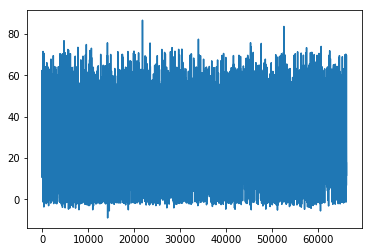

In [19]:
plt.plot(y_pred)

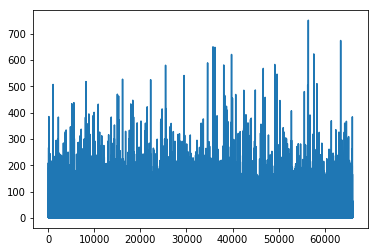

In [20]:
plt.plot(y_test)

In [21]:
from sklearn.preprocessing import PolynomialFeatures



In [22]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

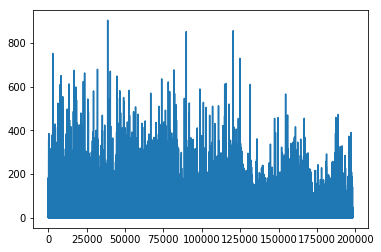

In [23]:
plt.plot(y)

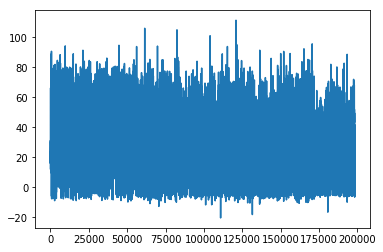

In [24]:
plt.plot( lin_reg_2.predict(poly_reg.fit_transform(X)))

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

In [26]:
X

array([[ 0.58759113,  0.77988862, -0.79625194, -0.78655385,  0.243087  ,
        -0.55079086],
       [ 0.58759113,  0.77988862,  0.0517317 , -0.79728012,  0.243087  ,
        -0.55079086],
       [ 0.58759113,  0.77988862,  0.68435441, -0.68465431,  0.243087  ,
        -0.55079086],
       ...,
       [ 0.58759113,  0.77988862, -0.79625194, -0.46476582, -1.12644972,
        -0.56070981],
       [ 0.58759113,  0.77988862, -0.67511142, -0.67929118, -1.12644972,
        -0.56070981],
       [ 0.58759113,  0.77988862, -0.79625194, -0.78655385, -1.14689057,
        -0.54087192]])

In [28]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

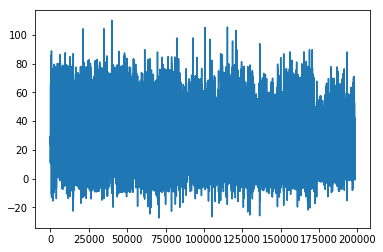

In [29]:
plt.plot( lin_reg_2.predict(poly_reg.fit_transform(X)))

In [ ]:
g = sns.FacetGrid(dataset, col="SRC_OUT_DEGREE", row="TGT_OUT_DEGREE", margin_titles=True)


In [ ]:
g.map(sns.plt.scatter, "NUM_WORDS", "tip")

# Add a title to the figure
g.fig.suptitle("this is a title")

# Show the plot
plt.show()